In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [16]:
import pandas as pd
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [36]:
# df_original = pd.read_csv('../input/train.tsv', sep='\t')
## Simple Features 
df = df_original[:10000]
df = df[df['price'] > 0.1]
# df.info()

df.shape

(9991, 8)

In [37]:
sorted = df.sort_values(by='price', ascending=False)
# sorted.head()
sorted.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
7129,7129,Brows beauty set,1,Beauty/Makeup/Eyes,NaN,3.0,1,No description yet
967,967,Biore nose face strips blackhead remover,1,Beauty/Skin Care/Face,Biore,3.0,1,Set of nose and face strip Ship in envelope
3793,3793,Yellow thong,2,Women/Underwear/G-Strings & Thongs,NaN,3.0,1,Never worn
3769,3769,5 Gerber Good Start Formula Coupons FS,1,Kids/Feeding/Bottle-Feeding,Gerber Good Start,3.0,1,Save [rm] when you buy any (1) 22oz. or larger...
3915,3915,2 pack of black chokers,1,Women/Jewelry/Necklaces,NaN,3.0,1,2 black chokers


In [21]:
stop_words = ["a", "an", "the", "and", "or", "but", "nor"]
try:
    words_vecs = sparse.load_npz('words_vecs.npz')
    print('loaded word_vecs from disc')
except:
    name_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 3))
    words_vecs = name_vectorizer.fit_transform(df['name'] + ' ' + df['item_description'])
    sparse.save_npz('words_vecs.npz', words_vecs)
words_vecs

loaded word_vecs from disc


<1482535x2982286 sparse matrix of type '<class 'numpy.float64'>'
	with 14128827 stored elements in Compressed Sparse Row format>

In [17]:
sparse.save_npz('words_vecs.npz', words_vecs)

In [5]:
from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [6]:
n_pca_components = 10
# pca = PCA(n_components=n_pca_components)
pca = TruncatedSVD(n_components=n_pca_components)
pca_words_vecs = pca.fit_transform(words_vecs)

In [8]:
pca_df = pd.DataFrame(pca_words_vecs, columns=('pca_' + str(i) for i in range(n_pca_components)))
df = df.join(pca_df)

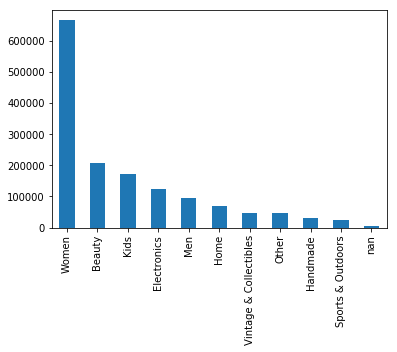

In [9]:
df['cat_split'] = df['category_name'].apply(lambda x: str(x).split('/'))

df['cat_1'] = df['cat_split'].apply(lambda x : x[0] if len(x)> 0 else None)

df['cat_1'].value_counts().plot(kind='bar')
plt.show()

df['cat_2'] = df['cat_split'].apply(lambda x : x[1] if len(x)> 1 else None)
df['cat_3'] = df['cat_split'].apply(lambda x : x[2] if len(x)> 2 else None)

# df['cat_2'].value_counts().head()

In [10]:
## Strings to numbers 

In [11]:
df['brand_name_freq'] = df['brand_name'].map(df['brand_name'].value_counts())

In [12]:
df_numbers = df[df.columns[df.dtypes != object]]

df_numbers.fillna(0, inplace=True)

features = df_numbers.columns.tolist()
features.remove('price')

features.remove('train_id')

label = 'price'

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [13]:
X = df_numbers[features]
y = df_numbers[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfr = RandomForestRegressor(n_estimators=50, max_depth=4, verbose=100, n_jobs=-1)
# rfr = RandomForestRegressor(n_estimators=2, max_depth=4, verbose=100, n_jobs=-1)
rfr.fit(X_train, y_train)

building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50building tree 5 of 50building tree 6 of 50building tree 7 of 50building tree 8 of 50building tree 9 of 50building tree 10 of 50building tree 11 of 50building tree 12 of 50building tree 13 of 50building tree 14 of 50building tree 15 of 50building tree 16 of 50building tree 17 of 50building tree 18 of 50building tree 20 of 50building tree 21 of 50building tree 22 of 50building tree 23 of 50building tree 24 of 50building tree 25 of 50building tree 26 of 50building tree 27 of 50building tree 28 of 50building tree 29 of 50building tree 19 of 50building tree 30 of 50building tree 31 of 50building tree 32 of 50































building tree 33 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.4s

[Parallel(n_jobs=-1)]: Done   2 out of  50 | elapsed:   40.0s remaining: 16.0min
building tree 34 of 50
building tree 35 of 50[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:   40.4s 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=100,
           warm_start=False)

In [14]:
## Evaluate 

from sklearn.metrics import mean_squared_log_error

rfr.set_params(verbose=0)

predictions = rfr.predict(X_test)

mean_squared_log_error(predictions, y_test)**0.5

0.75336940872172009

In [15]:
df_importance = pd.DataFrame()
df_importance['features'] = features

list(zip(features, rfr.feature_importances_))

[('item_condition_id', 0.0065130740272710194),
 ('shipping', 0.047056953091413153),
 ('pca_0', 0.0027610197238222738),
 ('pca_1', 0.00041020995913862776),
 ('pca_2', 0.0071572304193089952),
 ('pca_3', 0.081011453763622662),
 ('pca_4', 0.0),
 ('pca_5', 0.21871226500236951),
 ('pca_6', 0.10413777751395523),
 ('pca_7', 0.0),
 ('pca_8', 0.0),
 ('pca_9', 0.0013010610903020298),
 ('cat_1_freq', 0.16494819759121884),
 ('cat_2_freq', 0.030909405831551117),
 ('cat_3_freq', 0.1080767329123772),
 ('brand_name_freq', 0.2270046190736493)]